# 1 - Importações de Bibliotecas e Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_unic = "Unicorns in June 2022s end - june 2022.csv"
Base_Dados = pd.read_csv(base_unic)
Base_Dados.shape

(1170, 7)

In [3]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


# 2 - Tratamentos

In [4]:
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

### Renomeando Colunas

In [5]:
Base_Dados.rename(columns={
    "#": "Id",
    "Company": "Empresa",
    "Valuation ($B)": "Valor($)",
    "Date Joined": "Data de Adesão",
    "Country": "País",
    "City": "Cidade",
    "Industry": "Industria",
    "Investors": "Investidores"
}, inplace=True)

In [6]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1170 non-null   object
 1   Valor($)        1170 non-null   object
 2   Data de Adesão  1170 non-null   object
 3   País            1170 non-null   object
 4   City            1170 non-null   object
 5   Industria       1170 non-null   object
 6   Investidores    1152 non-null   object
dtypes: object(7)
memory usage: 64.1+ KB


### Convertendo Data e Valor de Objetos para seus respectivos Tipos

In [7]:
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2011-12-12
Name: Data de Adesão, dtype: datetime64[ns]

In [8]:
Base_Dados['Valor($)'] = pd.to_numeric(Base_Dados['Valor($)'].apply( lambda linha: linha.replace('$', '')))
Base_Dados.head()

,Empresa,Valor($),Data de Adesão,País,City,Industria,Investidores
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


### Verificando campos nulos

In [9]:
Base_Dados.isnull().sum()

Empresa            0
Valor($)           0
Data de Adesão     0
País               0
City               0
Industria          0
Investidores      18
dtype: int64

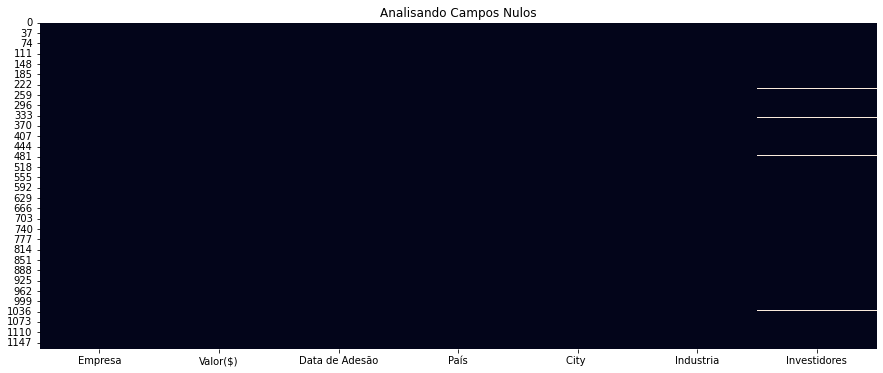

In [10]:
plt.figure(figsize=(15,6))
plt.title("Analisando Campos Nulos")
sns.heatmap(Base_Dados.isnull(), cbar=False);

### Campos Unicos

In [11]:
Base_Dados.nunique()

Empresa           1167
Valor($)           219
Data de Adesão     683
País                48
City               282
Industria           33
Investidores      1136
dtype: int64

In [13]:
Base_Dados['Industria'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST 

# 3 - Analises

## Industrias com mais Unicornios

In [14]:
Base_Dados['Industria'].value_counts()

Fintech                                                               236
Internet software & services                                          221
E-commerce & direct-to-consumer                                       105
Health                                                                 90
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    62
Cybersecurity                                                          58
Data management & analytics                                            44
Auto & transportation                                                  39
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 31
Consumer & retail                     

### Industrias com mais unicornios em %

In [17]:
round(Base_Dados['Industria'].value_counts(normalize=True) * 100, 2)

Fintech                                                               20.17
Internet software & services                                          18.89
E-commerce & direct-to-consumer                                        8.97
Health                                                                 7.69
Artificial intelligence                                                6.32
Other                                                                  5.56
Supply chain, logistics, & delivery                                    5.30
Cybersecurity                                                          4.96
Data management & analytics                                            3.76
Auto & transportation                                                  3.33
Hardware                                                               3.25
Mobile & telecommunications                                            3.16
Edtech                                                                 2.65
Consumer & r

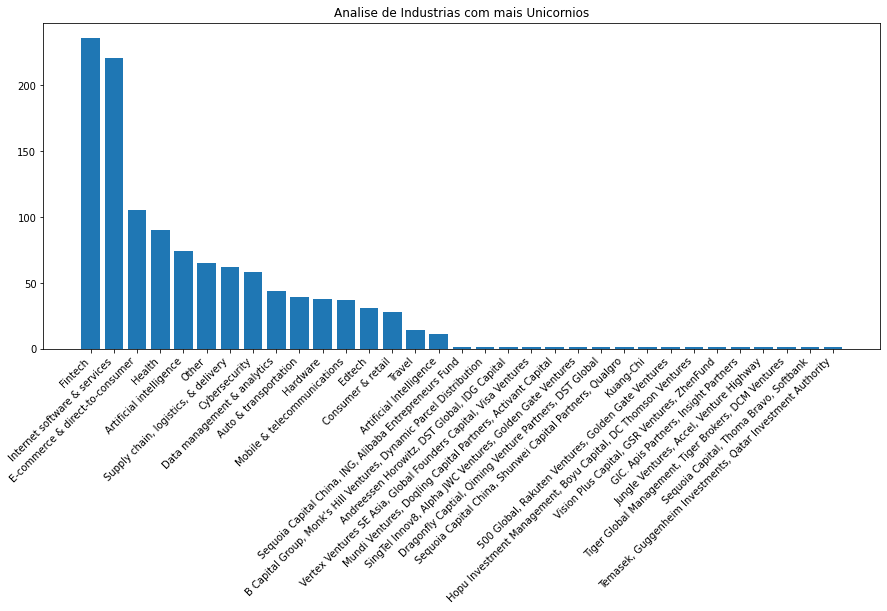

In [24]:
plt.figure(figsize=(15,6))
plt.title("Analise de Industrias com mais Unicornios")
plt.bar(Base_Dados['Industria'].value_counts().index, Base_Dados['Industria'].value_counts())
plt.xticks(rotation=45, ha="right");

## Paises com mais Unicornios

In [29]:
Base_Dados['País'].value_counts()

United States           628
China                   174
India                    68
United Kingdom           44
Germany                  29
France                   25
Israel                   21
Canada                   19
Brazil                   17
South Korea              15
Singapore                13
Australia                 8
Sweden                    8
Hong Kong                 7
Mexico                    7
Netherlands               7
Japan                     6
Ireland                   6
Switzerland               6
Indonesia                 6
Norway                    5
Spain                     4
Finland                   4
Belgium                   3
Turkey                    3
United Arab Emirates      3
Colombia                  3
Denmark                   2
South Africa              2
Croatia                   2
Philippines               2
Chile                     2
Thailand                  2
Estonia                   2
Austria                   2
Lithuania           

### Paises com mais Unicornios em %

In [32]:
Analise_Pais = round(Base_Dados['País'].value_counts(normalize=True) * 100,2)
print(Analise_Pais)

United States           53.68
China                   14.87
India                    5.81
United Kingdom           3.76
Germany                  2.48
France                   2.14
Israel                   1.79
Canada                   1.62
Brazil                   1.45
South Korea              1.28
Singapore                1.11
Australia                0.68
Sweden                   0.68
Hong Kong                0.60
Mexico                   0.60
Netherlands              0.60
Japan                    0.51
Ireland                  0.51
Switzerland              0.51
Indonesia                0.51
Norway                   0.43
Spain                    0.34
Finland                  0.34
Belgium                  0.26
Turkey                   0.26
United Arab Emirates     0.26
Colombia                 0.26
Denmark                  0.17
South Africa             0.17
Croatia                  0.17
Philippines              0.17
Chile                    0.17
Thailand                 0.17
Estonia   

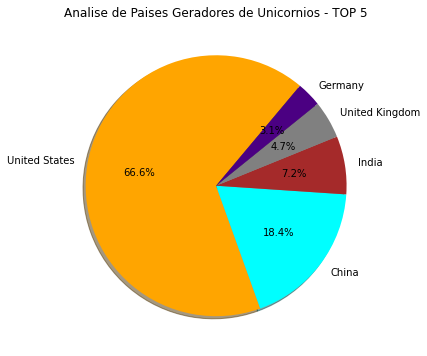

In [33]:
plt.figure(figsize=(15,6), facecolor='white')
plt.title("Analise de Paises Geradores de Unicornios - TOP 5")
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
plt.pie(
    Analise_Pais.head(5),
    colors=colors,
    labels= Analise_Pais.index[0:5],
    shadow=True,
    startangle=50,
    autopct='%1.1f%%'
);

## Tabela Analitica

In [34]:
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year
Base_Dados.head()

,Empresa,Valor($),Data de Adesão,País,City,Industria,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011


In [35]:
Analise_Agrupada = Base_Dados.groupby(by=['País', 'Mes', 'Ano', 'Empresa']).count().reset_index()
Analise_Agrupada

,País,Mes,Ano,Empresa,Valor($),Data de Adesão,City,Industria,Investidores
0,Argentina,8,2021,Uala,1,1,1,1,1
1,Australia,1,2018,Canva,1,1,1,1,1
2,Australia,3,2019,Airwallex,1,1,1,1,1
3,Australia,3,2022,Immutable,1,1,1,1,1
4,Australia,3,2022,LinkTree,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1165,United States,12,2021,Turing,1,1,1,1,1
1166,United States,12,2021,Veho,1,1,1,1,1
1167,United States,12,2021,YipitData,1,1,1,1,1
1168,Vietnam,10,2021,Sky Mavis,1,1,1,1,1


### Dados sobre o Brasil

In [36]:
Analise_Agrupada.loc[
    Analise_Agrupada['País'] == 'Brazil'
]

,País,Mes,Ano,Empresa,Valor($),Data de Adesão,City,Industria,Investidores
16,Brazil,1,2020,Loft,1,1,1,1,1
17,Brazil,1,2021,MadeiraMadeira,1,1,1,1,1
18,Brazil,2,2022,Neon,1,1,1,1,1
19,Brazil,5,2022,Dock,1,1,1,1,1
20,Brazil,6,2019,Loggi,1,1,1,1,1
21,Brazil,7,2018,Movile,1,1,1,1,1
22,Brazil,8,2021,Nuvemshop,1,1,1,1,1
23,Brazil,8,2021,Unico,1,1,1,1,1
24,Brazil,9,2019,QuintoAndar,1,1,1,1,1
25,Brazil,9,2021,CloudWalk,1,1,1,1,1


## Países com mais Valuable

In [37]:
Analise_Pais = Base_Dados.groupby(by=['País']).sum()['Valor($)'].reset_index().sort_values(by="Valor($)", ascending=False)
Analise_Pais

,País,Valor($)
46,United States,2055.04
9,China,674.09
45,United Kingdom,202.75
20,India,198.22
18,Germany,77.38
40,Sweden,62.52
17,France,57.02
1,Australia,54.40
7,Canada,49.23
23,Israel,44.72


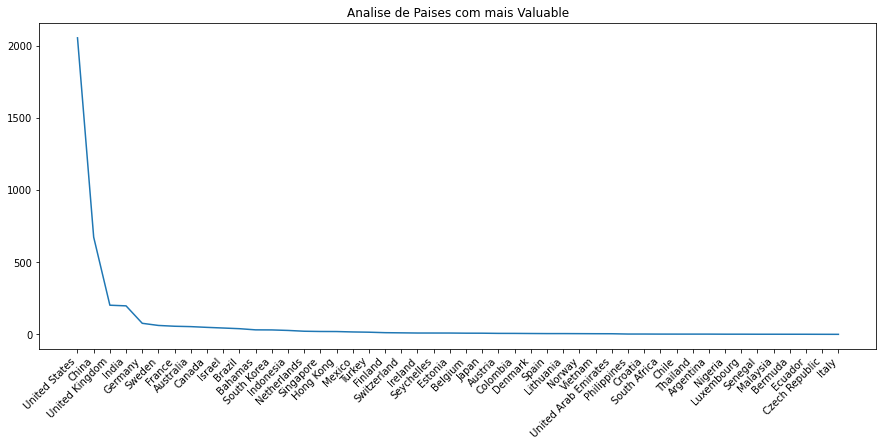

In [38]:
plt.figure(figsize=(15,6))
plt.title('Analise de Paises com mais Valuable')
plt.plot(Analise_Pais['País'], Analise_Pais['Valor($)'])
plt.xticks(rotation=45, ha="right");